# RDMetallics-Coordinate: prediction of metal-to-ligand coordination modes

### [![GitHub](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/moldagulovg/RDMetallics_coordinate) This demonstration notebook shows basic usage of RDMetallics python-wrapper for ligand to metal coordination.


### [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moldagulovg/confWorks/blob/main/docs/assets/prediction_demo.ipynb) Run this demo notebook can be run via Google Collab


## Setup

In [ ]:
! git clone https://github.com/chemprop/chemprop.git
! cd chemprop/requirements && pip install -r 2.0.0_requirements.txt
! pip install rdchiral

Paste the secret key to the cell below. This key will install the RDMetallics package prior to publication. Key is provided by authors.

Restart the google collab session for changes to take place

## Import necessary packages

In [1]:
import rdkit
print(rdkit.__version__)

from rdkit import Chem
from rdkit.Chem import Draw, AllChem

from rdkit.Chem import MolFromSmiles as mfs
from rdkit.Chem import MolToSmiles as mts

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
IPythonConsole.molSize = 300,300

import os
import tempfile
import shutil

import pandas as pd
import numpy as np

import rdmetallics

from rdmetallics.functions_wrapped import generate_model_input, generate_candidate_answers 
from rdmetallics.functions_wrapped import run_prediction_with_chemprop, analyze_prediction, prepare_candidate_dict

PATH = os.getcwd()
print(PATH)

2025.03.3
/home/galymzhan/RDMetallics_coordinate


## 1. Input your metal ion and ligand SMILES

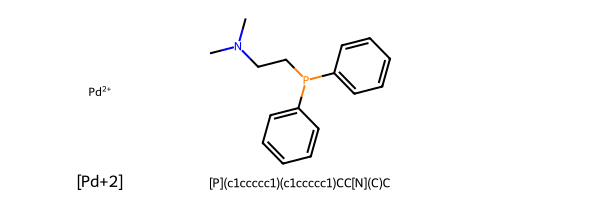

In [2]:
metal_smi = '[Pd+2]'

ligand_smi = '[P](c1ccccc1)(c1ccccc1)CC[N](C)C'

metal, ligand = mfs(metal_smi), mfs(ligand_smi)
display(Draw.MolsToGridImage([metal, ligand], legends=[metal_smi, ligand_smi]))

## 2. Generate candidate structures using CSD-extracted coordination SMARTS templates and prepare prediction model inputs

In [3]:
TEMP_DIR = PATH # tempfile.mkdtemp(prefix='temp_coord_')
os.chdir(TEMP_DIR)

# Generate candidate structures (candidates) from a collection of coordination SMARTS
candidate_answers = generate_candidate_answers(metal, ligand, ligand_smi)

# Save candidates as input for the model
input_filepath = os.path.join(TEMP_DIR, 'coord_predict_input.csv')
input_desc_filepath = os.path.join(TEMP_DIR, "coord_predict_ox_states.npz")
generate_model_input(candidate_answers, path_input=input_filepath, path_descriptor=input_desc_filepath)


14


## 3. Run prediction using an ensemble of five metal-to-ligand coordination models

In [4]:
run_prediction_with_chemprop(path_input=input_filepath, path_descriptor=input_desc_filepath)

100%|██████████| 5/5 [00:33<00:00,  6.63s/it]

Command executed successfully!


In [5]:
test_df, prediction_filename = analyze_prediction(input_filepath)


In [6]:
vals = prepare_candidate_dict(test_df)

===== Candidate group #0 for key ('[P](c1ccccc1)(c1ccccc1)CC[N](C)C', '[Pd]', 2) =====
('C[N]1(C)CC[P](->[Pd]<-1)(c1ccccc1)c1ccccc1', None, [0.90686625, 0.9866288, 0.95539325, 0.9097642, 0.89822245], '0.93 +/- 0.04')
('CN(C)CC[P](->[Pd])(c1ccccc1)c1ccccc1', None, [0.26564288, 0.38055414, 0.16415887, 0.28626728, 0.19697587], '0.26 +/- 0.08')
('C[N](C)(->[Pd])CCP(c1ccccc1)c1ccccc1', None, [1.2646985e-05, 1.552569e-05, 0.00039108604, 0.00023883619, 0.0001134035], '0.00 +/- 0.00')
('CN(C)CCP(C1=CC=C[CH]2[Pd][CH]12)c1ccccc1', None, [3.884408e-07, 8.872062e-11, 6.7251216e-10, 2.4245814e-10, 2.0878436e-11], '0.00 +/- 0.00')
('CN(C)CCP(C1=C[CH]2[Pd][CH]2C=C1)c1ccccc1', None, [6.063422e-08, 1.4490711e-10, 4.293949e-11, 4.875773e-10, 4.9927624e-13], '0.00 +/- 0.00')
('CN(C)CCP(c1ccccc1)c1cc[cH]2->[Pd]<-[cH]2c1', None, [3.838135e-10, 2.2508623e-08, 2.1980501e-08, 3.4523688e-09, 7.046197e-11], '0.00 +/- 0.00')
('CN(C)CCP(c1ccccc1)c1ccc[cH]2->[Pd]<-[cH]12', None, [1.1304551e-10, 6.9614976e-09, 2.60

In [7]:
for idx, (smi, a,  _, score) in enumerate(vals):
    print(idx, smi, a, score)

0 C[N]1(C)CC[P](->[Pd]<-1)(c1ccccc1)c1ccccc1 None 0.93 +/- 0.04
1 CN(C)CC[P](->[Pd])(c1ccccc1)c1ccccc1 None 0.26 +/- 0.08
2 C[N](C)(->[Pd])CCP(c1ccccc1)c1ccccc1 None 0.00 +/- 0.00
3 CN(C)CCP(C1=CC=C[CH]2[Pd][CH]12)c1ccccc1 None 0.00 +/- 0.00
4 CN(C)CCP(C1=C[CH]2[Pd][CH]2C=C1)c1ccccc1 None 0.00 +/- 0.00
5 CN(C)CCP(c1ccccc1)c1cc[cH]2->[Pd]<-[cH]2c1 None 0.00 +/- 0.00
6 CN(C)CCP(c1ccccc1)c1ccc[cH]2->[Pd]<-[cH]12 None 0.00 +/- 0.00
7 CN(C)CCP1C2=C[CH]3[CH](C=C2)[Pd]32[CH]3C=CC1=C[CH]32 None 0.00 +/- 0.00
8 CN(C)CCP1C2=CC=C[CH]3[CH]2[Pd]32[CH]3C=CC=C1[CH]32 None 0.00 +/- 0.00
9 CN(C)CCP1C2=C[CH]3[CH](C=C2)[Pd]32[CH]3C=CC=C1[CH]32 None 0.00 +/- 0.00
10 CN(C)CCP(C1=C[CH]2[CH]3[CH]4[CH]1[Pd]234)c1ccccc1 None 0.00 +/- 0.00
11 CN(C)CCP(c1ccccc1)c1cc[cH](->[Pd])cc1 None 0.00 +/- 0.00
12 CN(C)CCP(c1ccccc1)c1ccc[cH](->[Pd])c1 None 0.00 +/- 0.00
13 CN(C)CCP(c1ccccc1)c1cccc[cH]1->[Pd] None 0.00 +/- 0.00


## 4. Visualize original inputs as well as all predicted coordination modes

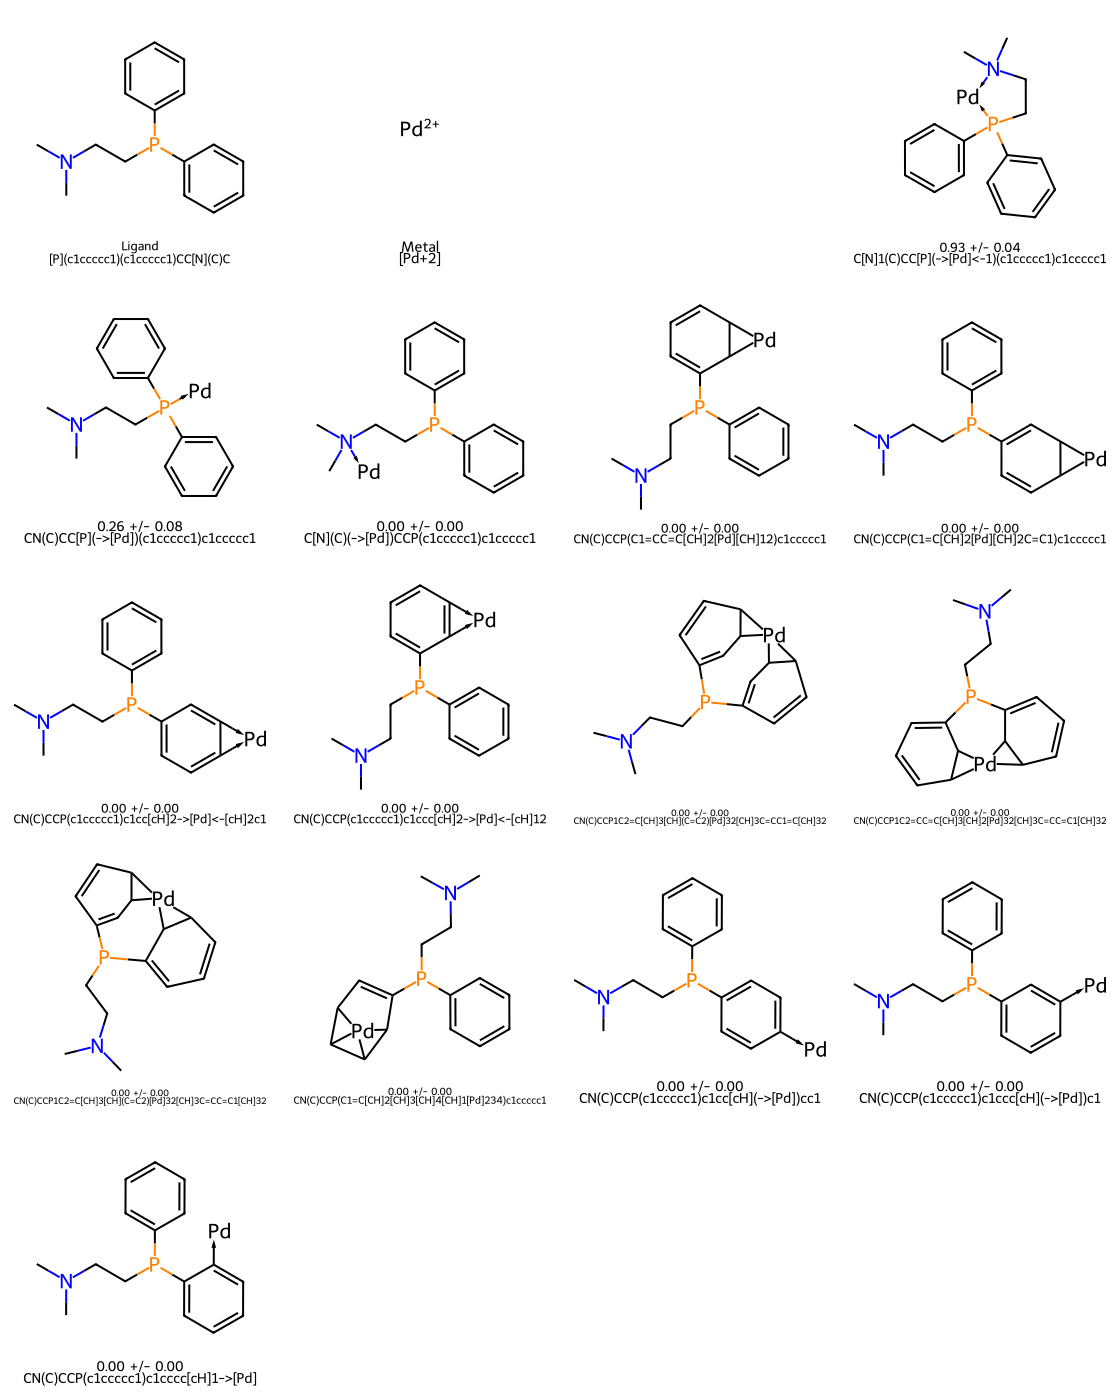

In [8]:
from rdmetallics.visualization import generate_visualization_tiles
from rdmetallics.functions_wrapped import generate_visualization
# tiles = generate_visualization_tiles(vals, metal_smi, ligand_smi, complex_smi = '')
grid = generate_visualization(vals, metal_smi, ligand_smi, complex_smi = '')
display(grid)
